项目：识别用户活动有无欺诈性

项目介绍 

公司XYZ是一个销售手工服装的电子商务网站。

您必须构建一个模型来预测用户是否有很高的概率使用该站点执行一些非法活动。


你只有用户首次交易的信息，你必须根据这些信息进行分类(“欺诈/无欺诈”)。

项目要解决的问题 
1.对于每个用户，根据IP地址确定他们的国家


2.构建一个模型来预测一个活动是否具有欺骗性。解释negative false 和 negative positive这两个不同假设如何影响模型以及带来的损失。


3.你的老板有点担心使用一个她不理解的模型来做一些像欺诈检测这样重要的事情。你如何向她解释模型是如何做出预测的?不是从数学的角度(她根本不在乎)，而是从用户的角度。什么样的用户更有可能被归类为风险人群?他们有什么特点?


4.假设您现在有了这个模型，可以实时地预测某个活动是否具有欺骗性。从产品的角度来看，你会如何使用它?也就是说，您将基于模型输出构建什么样的不同用户体验？

项目用到两个数据集：用户特征数据集和IP数据集
用户特征数据集：
* user_id:用户ID(唯一）
* signup_time:用户注册时间（GMT)
* purchase_time:用户购买时间（GMT)
* purchase_value:购买金额（USD）
* device_id:设备id，可以假设它在每个设备上是唯一的。
* source:用户来源:广告、SEO、直接(即直接在浏览器上输入网站地址进入网站)
* browser:用户使用的浏览器
* sex:用户性别 男/女
* age:用户年龄
* ip_address:用户IP地址
* class:这就是我们试图预测的:该活动有欺骗性(1)或没有欺骗性(0)

IP数据集：根据用户的Ip地址得到用户所在的国家。对于每个国家，它给出了一个范围。如果ip地址为数字，则该ip地址属于对应的国家。
* lower_bound_ip_address
* upper_bound_ip_address 
* country : 对应的国家。如果一个用户的ip地址值在上限和下限之内，那么他就属于这个国家

In [7]:
import pandas as pd
import numpy as np

data=pd.read_csv("Fraud_Data.csv")

data['ip_address']=round(data['ip_address'])
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [8]:
data.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209300e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [9]:
ip_addresses=pd.read_csv("IpAddress_to_Country.csv")

ip_addresses.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


4. 第一题解答：对于每个用户，根据IP地址确定他们的国家:

In [10]:
user_ip=data['ip_address'].values
lb = ip_addresses.lower_bound_ip_address.values
up = ip_addresses.upper_bound_ip_address.values

#i返回的是能用IP找到country的index，j返回的是对应的IP区间的index
i, j = np.where((user_ip[:, None] >= lb) & (user_ip[:, None] <= up))

df = pd.DataFrame(
    np.column_stack([data['ip_address'].values[i], ip_addresses.values[:,2][j]]),
    columns=['ip_address','country']
)

In [11]:
#删除掉重复的IP
df1=df.drop_duplicates(subset=['ip_address','country'])

In [12]:
#合并数据
data=data.merge(df1,on='ip_address',how='left')
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.32758e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.50311e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.62147e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.84054e+09,0,NaN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.15583e+08,0,United States


In [13]:
#返回前十个有IP数量最多的国家
data.groupby('country').size().nlargest(10)

country
United States        58049
China                12038
Japan                 7306
United Kingdom        4490
Korea Republic of     4162
Germany               3646
France                3161
Canada                2975
Brazil                2961
Italy                 1944
dtype: int64

4. 第二题解答：构建一个模型来预测一个活动是否具有欺骗性:

4.1 特征工程:

特征一：注册时间和购买时间的时间差:

In [14]:
data['purchase_time']=pd.to_datetime(data['purchase_time'])
data['signup_time']=pd.to_datetime(data['signup_time'])

data['purchase_signup_diff']=(data['purchase_time']-data['signup_time']).astype('timedelta64[s]')
#方法二：(data["purchase_time"]-data["signup_time"]).dt.total_seconds()

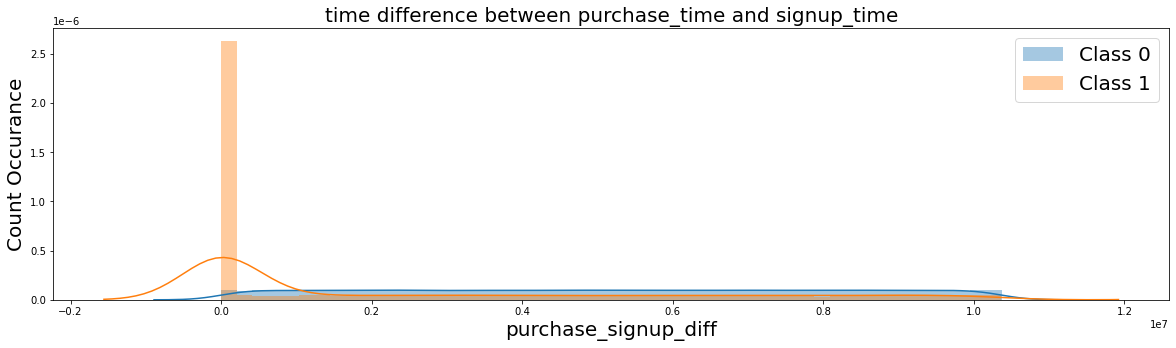

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize = (20,5))
sns.distplot(data[data['class']==0].purchase_signup_diff, bins = 50, label = 'Class 0')
sns.distplot(data[data['class']==1].purchase_signup_diff, bins = 50, label = 'Class 1')
ax.set_title('time difference between purchase_time and signup_time',fontsize=20)
ax.set_ylabel('Count Occurance',fontsize=20)
ax.set_xlabel('purchase_signup_diff',fontsize=20)
ax.legend(fontsize=20)

可以看出，时间上的差异确实对是否欺诈有关

特征二：每个device设备有多少个用户使用:

In [16]:
data['device_id_count']=data.groupby('device_id')['user_id'].transform('count')

Text(0.5, 1.0, 'fraud rate by device_id_count')

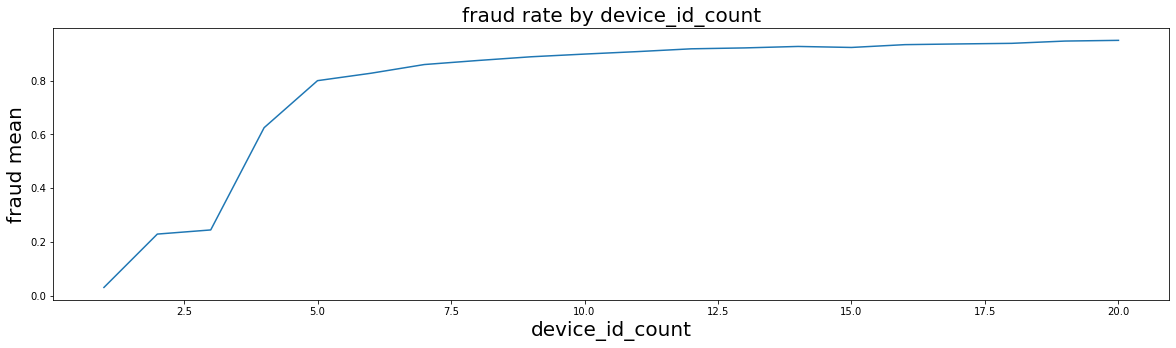

In [17]:
fig, ax = plt.subplots(figsize = (20,5))
ax.set_title('device_id_count trend')
groupby = data.groupby('device_id_count')['class'].mean().reset_index()
x= np.array(groupby['device_id_count'])
y= np.array(groupby['class'])
ax.set_ylabel('fraud mean',fontsize=20)
ax.set_xlabel('device_id_count',fontsize=20)
ax.plot(x, y, '-')
ax.set_title('fraud rate by device_id_count',fontsize=20)

可以看出，device被用户使用的数量多少确实对是否欺诈有关

特征三：每个IP有多少个用户使用:

In [18]:
data['ip_address_count']=data.groupby('ip_address')['user_id'].transform('count')

Text(0.5, 1.0, 'fraud rate by ip_address_count')

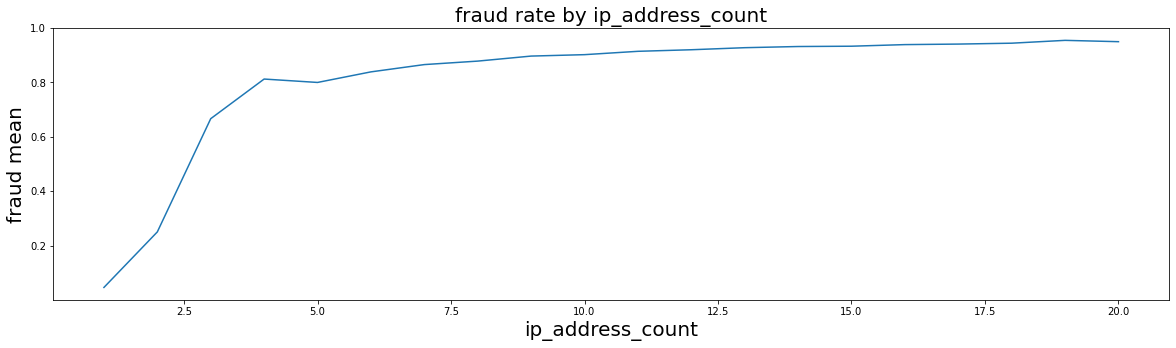

In [19]:
fig, ax = plt.subplots(figsize = (20,5))
groupby = data.groupby('ip_address_count')['class'].mean().reset_index()
x= np.array(groupby['ip_address_count'])
y= np.array(groupby['class'])
ax.set_ylabel('fraud mean',fontsize=20)
ax.set_xlabel('ip_address_count',fontsize=20)
ax.plot(x, y, '-')
ax.set_title('fraud rate by ip_address_count',fontsize=20)

可以看出，device被用户使用的数量多少确实对是否欺诈有关

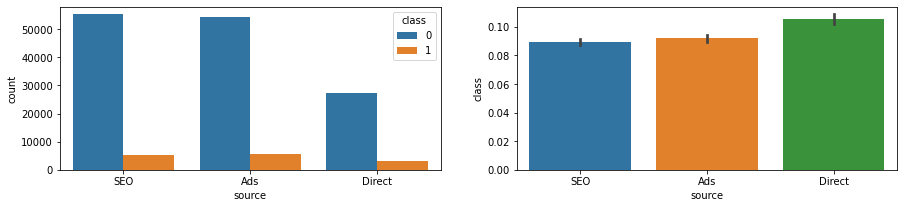

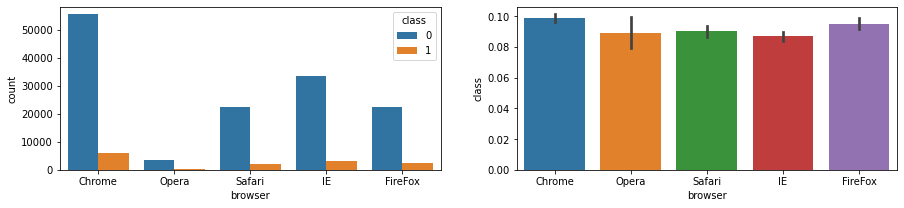

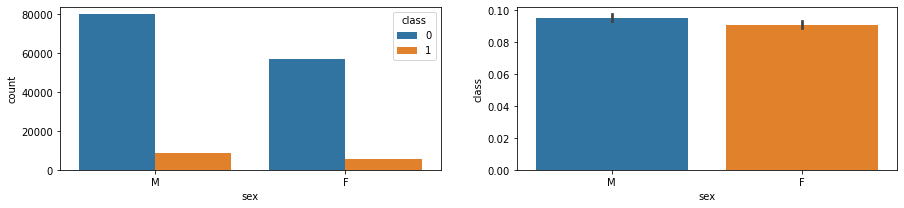

In [20]:
#categorical feature分类特征：source,browser,sex

for col in ['source','browser','sex']:
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,3))
    sns.countplot(x=col, hue = 'class', data = data,ax = ax[0])
    sns.barplot(x=col, y='class', data = data, ax = ax[1] )

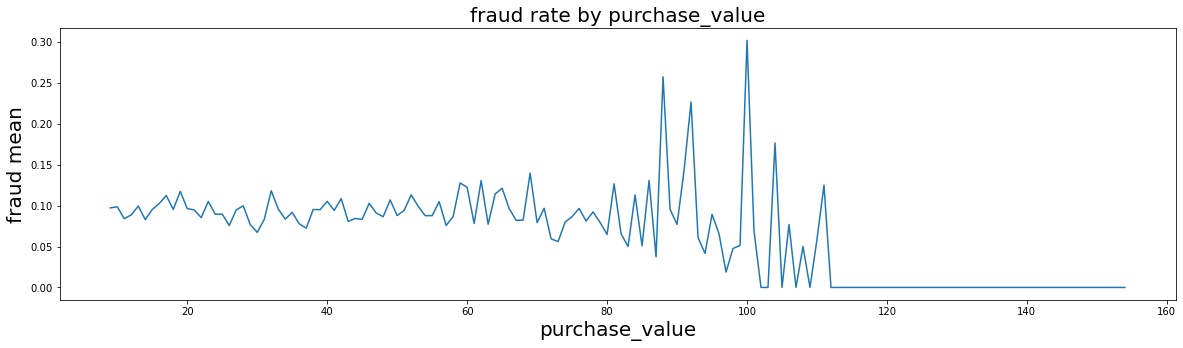

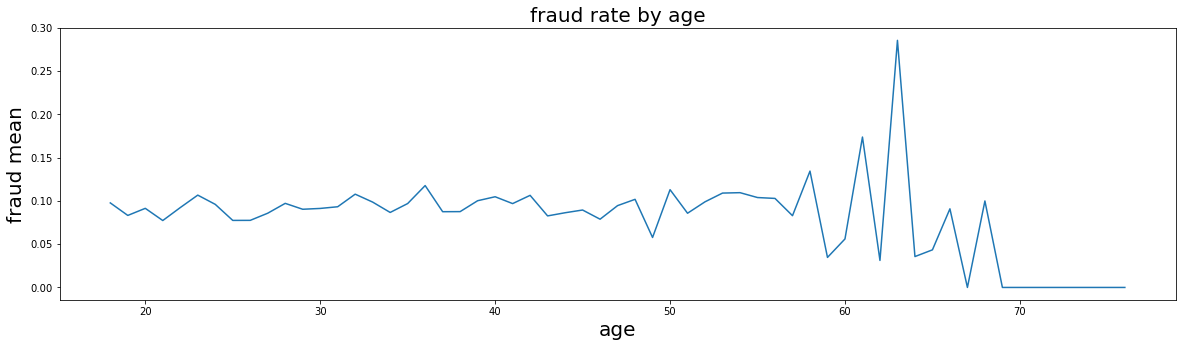

In [21]:
#连续型变量特征 purchase_value,age

for col in ['purchase_value', 'age']:
    fig, ax = plt.subplots(figsize = (20,5))
    groupby = data[[col,'class']].groupby(col).mean().reset_index()
    x= np.array(groupby[col])
    y= np.array(groupby['class'])
    ax.plot(x, y, '-')
    ax.set_title('fraud rate by {}'.format(col),fontsize=20)
    ax.set_xlabel('{}'.format(col),fontsize=20)
    ax.set_ylabel('fraud mean',fontsize=20)


4.2 特征选择:

In [49]:
#将user_id,device_id,ip_address这三列删除
new_data=data.drop(['user_id','device_id','signup_time','purchase_time','ip_address'],axis=1)

In [51]:
#将country变量中的None替换为Not_found
new_data['country'].replace([None], "Not_found", inplace=True)

In [81]:
#将分类型变量转换成数值label
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

new_data['source']=le.fit_transform(new_data['source'])
new_data['country']=le.fit_transform(new_data['country'])
new_data['browser']=le.fit_transform(new_data['browser'])
new_data['sex']=le.fit_transform(new_data['sex'])
new_data.head()

,purchase_value,source,browser,sex,age,class,country,purchase_signup_diff,device_id_count,ip_address_count
0,34,2,0,1,39,0,84,4506682.0,1,1
1,16,0,0,0,53,0,172,17944.0,1,1
2,15,2,3,1,53,1,172,1.0,12,12
3,44,2,4,1,41,0,125,492085.0,1,1
4,39,0,4,1,45,0,172,4361461.0,1,1


4.3 随机森林建模:

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from datetime import datetime
np.random.seed(4684)

#split into train and test to avoid overfitting
train, test = train_test_split(new_data, test_size = 0.34)
  
#build the model
rf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True)
rf.fit(train.drop('class', axis=1), train['class'])
  
#let's print OOB accuracy and confusion matrix
print("OOB accuracy is", rf.oob_score_, "\n", "OOB Confusion Matrix", "\n",
      pd.DataFrame(confusion_matrix(train['class'], rf.oob_decision_function_[:,1].round(), labels=[0, 1])))

OOB accuracy is 0.9559223125745742 
 OOB Confusion Matrix 
        0     1
0  90252   193
1   4203  5085


In [70]:
#and let's print test accuracy and confusion matrix
print("Test accuracy is", rf.score(test.drop('class', axis=1),test['class']), "\n", "Test Set Confusion Matrix", "\n",
      pd.DataFrame(confusion_matrix(test['class'], rf.predict(test.drop('class', axis=1)), labels=[0, 1])))

Test accuracy is 0.9556238930302263 
 Test Set Confusion Matrix 
        0     1
0  46443    73
1   2207  2656


In [80]:
#特征重要性
[*zip(train.drop('class', axis=1).columns,rf.feature_importances_)]

[('purchase_value', 0.09574761924628593),
 ('source', 0.012263705672652215),
 ('browser', 0.024451278368179428),
 ('sex', 0.011169684605768448),
 ('age', 0.08025546239598169),
 ('country', 0.05736789724461854),
 ('purchase_signup_diff', 0.4394303151522233),
 ('device_id_count', 0.11399705889402634),
 ('ip_address_count', 0.16531697842026422)]

In [89]:
#预测结果得概率
pred_prob=rf.predict_proba(test.drop('class', axis=1))[:,1]

#预测结果得class(0,1)
pred = rf.predict(test.drop('class', axis=1))

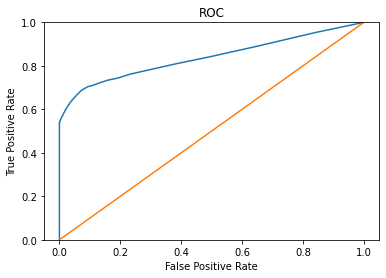

In [96]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
#Let's get false positive rate and true positive rate and plot them in the ROC
fpr, tpr, thresholds = roc_curve(test['class'],pred_prob)
#plot
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1])
plt.ylim([0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

根据ROC，如果我们想要最小化FP，我们可以选择一个阀值，使我们的真阳性率接近0.6和假阳性率基本上为零。然而，如果我们关心最大化的真阳性率，我们将不得不将阀值下调。这样我们就可以将更多的事件归为“1”:有些是真事件(因此真阳性上升)，而许多是假事件(因此假阳性也会上升)。

5. 第四题解答：假设您现在有了这个模型，可以实时地预测某个活动是否具有欺骗性。从产品的角度来看，你会如何使用它?也就是说，您将基于模型输出构建什么样的不同用户体验？:

现在，已经建立好了一个模型可以为每个用户分配进行欺诈的可能性。而且，尽管我们的模型做得很好，但是没有一个模型是完美的，一定会有些错误的分类。现在至关重要的是考虑构建一种产品，以最大程度地减少这些错误分类的影响（即成本）。一种非常常用的方法是根据模型得分来考虑创建不同的体验。

* 如果 predicted fraud probability < X, 则表明该用户是在正常使用（绝大多数用户应属于这个范围）


* 如果 X <= predicted fraud probability < Z 则表明这个用户存在风险，但不是很多。则可以创建其他验证步骤，例如通过SMS发送的代码验证电话号码或要求通过社交网络帐户登录


* 如果 predicted fraud probability >= Z，则表明用户在尝试欺诈，则可以告诉用户其活动已被暂停，将此用户信息发送给手动审核的人，最后要么阻止用户。或者确认这不是欺诈，就可以恢复会话

面试题：使用监督机器学习预测欺诈行为的缺点是什么？
另一种问法是有监督机器学习的缺点是什么，特别是当信噪比非常低的时候（信噪比低意味着噪音越大）。

有监督学习方法需要训练集有足够多的正向类实例，才能足够用于训练算法，可能对于大公司这方面的数据比较多像上面这个项目，但是小公司是非常少的。并且训练集是基于过去被认定为欺诈的事件，如果有人在过去犯下欺诈行为，但你没有发现他们，不仅你的模型无法预测他们是欺诈行为，而且它会被训练识成合法交易。这可能会形成一个非常危险的恶性循环，越来越多的欺诈行为会发生。

最后，可能也是最重要的一点是，对于那些不遵循以往欺诈模式而想出新的欺诈方式的人来说，这种方法没有提供任何保护。你可能会总是落后一步：骗子找到新的诈骗方式来欺诈，但当你意识到并且重新训练得到新模型了，他们又把一种新的欺诈手段已经开发出来了。

所以一种更有效的防止欺诈的技术是使用异常检测（anomaly detection)。在这种情况下，可以将任何与合法交易明显不同模式的交易定义为欺诈。这在理论上解决了上述大部分问题，因为你的模型并不是针对特定类型的欺诈行为进行训练，而只是针对不同的行为。然而，异常检测有其自身的局限性。例如，在高维中，几乎需要保证每个事务至少在一个维上是离群值(维数诅咒)，因此异常检测方法需要在时间方面进行大量投资，以准确定义什么是异常。

通常情况下，将监督机器学习和异常检测这两种方法结合起来，以最小化彼此的弱点，往往是最好的办法:如果用户的模式与过去的欺诈类似或者如果他们是异常的，就阻止用户活动。